# Yanux YouTube Viewer

## Imports

In [105]:
import numpy as np
from scipy import stats
import statsmodels.stats.proportion as smp
import pandas as pd
import matplotlib.pyplot as plt

## Helper Functions

In [106]:
def print_stats(data, hist_bins=10, hist_size=(8,4)):
    print('--- Statistics ----')
    display(data.describe())
    print('\n')
    print('--- Counting Unique Values ----')
    display(data.value_counts())
    print('\n')
    print('--- Basic Histogram ----')
    data.hist(bins=hist_bins, figsize=hist_size)
    plt.show()
    
def calculate_sus(data):
    for i in range(len(data.columns)):
        if i % 2:
            data.iloc[:,i] = 7 - data.iloc[:,i]
        else:
            data.iloc[:,i] = data.iloc[:,i] - 1

    data['Score'] = data.iloc[:,0:10].sum(axis=1)
    data['Score 100'] = data['Score'] * (100/60)
    return data

def confidence_interval_t(data, confidence_level=0.95):
    return stats.t.interval(confidence_level, data.count()-1, data.mean(), data.sem())
    

## Load Excel

In [107]:
data = pd.read_excel('data/userstudies/yanux-youtube-viewer-questionnaire-responses.xlsx', sheet_name=None)  

In [108]:
data_basic = data['Basic']
#display(data_basic)

### Age

--- Statistics ----


count    15.000000
mean     28.466667
std       9.203002
min      22.000000
25%      24.000000
50%      26.000000
75%      29.500000
max      59.000000
Name: Age, dtype: float64



--- Counting Unique Values ----


24    3
22    3
26    2
33    2
28    1
59    1
30    1
25    1
29    1
Name: Age, dtype: int64



--- Basic Histogram ----


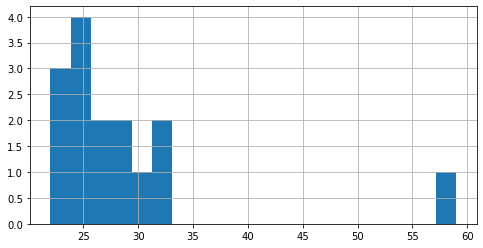

Population Standard Deviation:
8.89094420682578


In [109]:
data_basic_age = data_basic['Age']
print_stats(data_basic_age, hist_bins=20)
print('Population Standard Deviation:')
print(data_basic_age.std(ddof=0))

### Gender

--- Statistics ----


count       15
unique       2
top       Male
freq         9
Name: Genre, dtype: object



--- Counting Unique Values ----


Male      9
Female    6
Name: Genre, dtype: int64



--- Basic Histogram ----


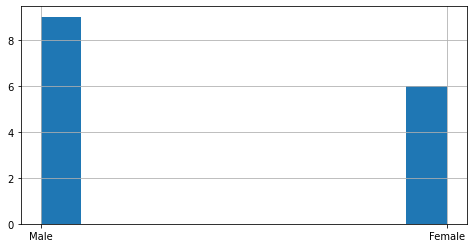

In [110]:
#TODO: This should be Gender. I don't know why I called "Genre"
data_basic_genre = data_basic['Genre']
print_stats(data_basic_genre)

### Education

--- Statistics ----


count                    15
unique                    4
top       Bachelor's Degree
freq                      8
Name: Education, dtype: object



--- Counting Unique Values ----


Bachelor's Degree      8
Master's Degree        5
Secondary Education    1
Doctoral Degree        1
Name: Education, dtype: int64



--- Basic Histogram ----


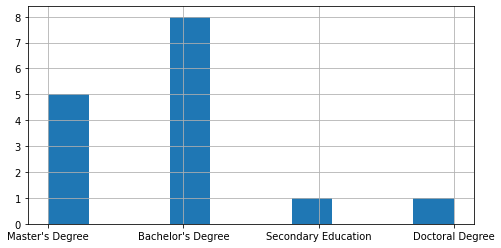

In [111]:
data_basic_education = data_basic['Education']
print_stats(data_basic_education)

### Type of Devices

In [112]:
data_basic_type_of_devices = data_basic['Type of Devices'].map(lambda x: [i.strip() for i in x.split(",")])
print('--- Statistics ----')
display(data_basic_type_of_devices.describe())
#print('--- Basic Histogram ----')
#data_basic_type_of_devices.hist()

--- Statistics ----


count                                                    15
unique                                                   10
top       [Desktop computer, Laptop computer, Smartphone...
freq                                                      4
Name: Type of Devices, dtype: object

--- Statistics ----


count    15.000000
mean      4.266667
std       1.486447
min       2.000000
25%       3.500000
50%       5.000000
75%       5.000000
max       7.000000
Name: Type of Devices, dtype: float64



--- Counting Unique Values ----


5    6
2    3
4    3
6    1
7    1
3    1
Name: Type of Devices, dtype: int64



--- Basic Histogram ----


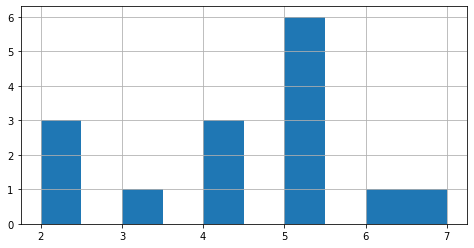

In [113]:
data_number_of_devices = data_basic_type_of_devices.apply(len)
print_stats(data_number_of_devices)

--- Statistics ----


count    15.000000
mean      5.933333
std       1.334523
min       2.000000
25%       5.500000
50%       6.000000
75%       7.000000
max       7.000000
Name: Number of Devices, dtype: float64



--- Counting Unique Values ----


7    6
6    5
5    3
2    1
Name: Number of Devices, dtype: int64



--- Basic Histogram ----


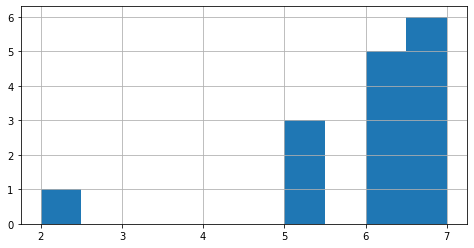

Population Standard Deviation:
1.2892719737209146


In [114]:
data_basic_multiple_devices = data_basic['Number of Devices']
print_stats(data_basic_multiple_devices)
print('Population Standard Deviation:')
print(data_basic_multiple_devices.std(ddof=0))

## SUS

#### Questions

1. I think that I would like to use this system frequently.
2. I found the system unnecessarily complex.
3. I thought the system was easy to use.
4. I think that I would need the support of a technical person to be able to use this system.
5. I found the various functions in this system were well integrated.
6. I thought there was too much inconsistency in this system.
7. I would imagine that most people would learn to use this system very quickly.
8. I found the system very cumbersome to use.
9. I felt very confident using the system.
10. I needed to learn a lot of things before I could get going with this system.

In [115]:
data_sus = calculate_sus(data['SUS'].copy().dropna())
data_sus

,SUS1,SUS2,SUS3,SUS4,SUS5,SUS6,SUS7,SUS8,SUS9,SUS10,Score,Score 100
0,6,6,6,6,5,6,6,6,6,6,59,98.333333
1,5,6,6,6,6,6,6,6,6,6,59,98.333333
2,6,6,6,6,5,6,6,6,6,5,58,96.666667
3,5,6,6,6,5,6,6,6,6,6,58,96.666667
4,5,5,6,6,5,5,6,6,5,6,55,91.666667
5,5,6,6,6,5,6,6,6,5,6,57,95.000000
6,6,6,6,5,6,1,6,4,3,6,49,81.666667
7,5,6,5,6,5,5,5,5,5,6,53,88.333333
8,4,5,4,5,4,5,5,6,4,5,47,78.333333
9,6,6,6,6,6,6,6,6,6,6,60,100.000000


#### Mean Score 100

In [116]:
print(data_sus['Score 100'].mean())

91.8888888888889


#### General Stats

In [117]:
data_sus.describe()
#print_stats(data_sus)

,SUS1,SUS2,SUS3,SUS4,SUS5,SUS6,SUS7,SUS8,SUS9,SUS10,Score,Score 100
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,5.333333,5.800000,5.533333,5.866667,5.000000,5.333333,5.533333,5.666667,5.200000,5.866667,55.133333,91.888889
std,0.723747,0.414039,0.639940,0.351866,0.755929,1.290994,0.639940,0.617213,0.941124,0.351866,3.852025,6.420041
min,4.000000,5.000000,4.000000,5.000000,3.000000,1.000000,4.000000,4.000000,3.000000,5.000000,47.000000,78.333333
25%,5.000000,6.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.500000,5.000000,6.000000,53.000000,88.333333
50%,5.000000,6.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,5.000000,6.000000,57.000000,95.000000
75%,6.000000,6.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,58.000000,96.666667
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,60.000000,100.000000


#### Confidence Interval

In [118]:
confidence_interval_t(data_sus['Score 100'])

(88.33358848104832, 95.44418929672948)

#### Per-question Stats

In [119]:
##Uncomment if you need these stats
#for column in data_sus:
    #print_stats(data_sus[column])

## NPS

In [120]:
data_nps = data['NPS'].copy().dropna()
data_nps

,NPS
0,10
1,10
2,10
3,8
4,9
5,7
6,10
7,9
8,7
9,10


### Calculate NPS

In [121]:
nps_count = data_nps['NPS'].count()
nps_promoters = data_nps['NPS'][data_nps['NPS'] >= 9].count()
nps_detractors = data_nps['NPS'][data_nps['NPS'] <= 6].count()

nps_promoters_per = nps_promoters/nps_count*100
nps_detractors_per = nps_detractors/nps_count*100

nps_score = nps_promoters_per - nps_detractors_per
print('NPS Count', nps_count)
print('NPS Promoters', nps_promoters)
print('NPS Detractors', nps_detractors)
print('NPS Promoters (Percentage)', nps_promoters_per)
print('NPS Detractors (Percentage)', nps_detractors_per)

NPS Count 15
NPS Promoters 10
NPS Detractors 0
NPS Promoters (Percentage) 66.66666666666666
NPS Detractors (Percentage) 0.0


### NPS Mean

In [122]:
print(data_nps.mean())

NPS    8.933333
dtype: float64


#### General Stats

In [123]:
data_nps.describe()
#print_stats(data_nps)

,NPS
count,15.000000
mean,8.933333
std,1.099784
min,7.000000
25%,8.000000
50%,9.000000
75%,10.000000
max,10.000000


## Domain Specific Questions

In [124]:
data_domain_specific = data['Domain Specific']
#data_domain_specific

--- Statistics ----


,DS1,DS2,DS3,DS4,DS5,DS6
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,5.933333,5.866667,6.400000,6.133333,5.866667,5.933333
std,1.334523,0.833809,1.055597,1.125463,1.187234,0.883715
min,2.000000,4.000000,3.000000,3.000000,3.000000,4.000000
25%,5.500000,5.500000,6.000000,6.000000,5.500000,5.500000
50%,6.000000,6.000000,7.000000,6.000000,6.000000,6.000000
75%,7.000000,6.000000,7.000000,7.000000,7.000000,6.500000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000




--- Counting Unique Values ----


DS1  DS2  DS3  DS4  DS5  DS6
2    5    7    7    6    6      1
5    6    6    5    5    6      1
               6    6    6      1
     7    7    6    7    7      1
6    4    7    7    7    7      1
     5    7    5    5    7      1
     6    6    7    4    5      1
          7    6    6    6      1
     7    7    7    7    6      1
7    5    3    3    3    6      1
     6    6    6    6    4      1
                         6      1
          7    7    6    5      1
                    7    7      1
     7    7    7    7    5      1
dtype: int64



--- Basic Histogram ----


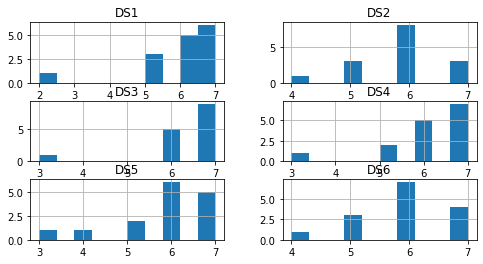

In [125]:
print_stats(data_domain_specific)

### Response Frequency

In [126]:
data_domain_specific_freq_res = (data_domain_specific.apply(pd.value_counts).fillna(0)/data_domain_specific.count()*100).transpose()
data_domain_specific_freq_res

,2,3,4,5,6,7
DS1,6.666667,0.000000,0.000000,20.000000,33.333333,40.000000
DS2,0.000000,0.000000,6.666667,20.000000,53.333333,20.000000
DS3,0.000000,6.666667,0.000000,0.000000,33.333333,60.000000
DS4,0.000000,6.666667,0.000000,13.333333,33.333333,46.666667
DS5,0.000000,6.666667,6.666667,13.333333,40.000000,33.333333
DS6,0.000000,0.000000,6.666667,20.000000,46.666667,26.666667


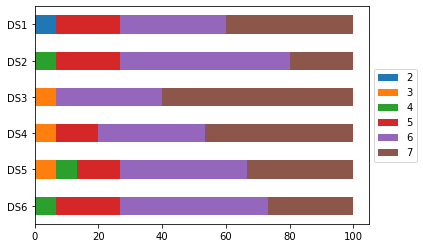

In [127]:
data_domain_specific_freq_res.iloc[::-1].plot.barh(stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [128]:
for question in data_domain_specific:
    print(question,
          'Median:', data_domain_specific[question].median(), 
          'Mean:', data_domain_specific[question].mean(), 
          'Standard Deviation:', data_domain_specific[question].std(), 
          'Confidence Interval:', confidence_interval_t(data_domain_specific[question]))

DS1 Median: 6.0 Mean: 5.933333333333334 Standard Deviation: 1.334523278535216 Confidence Interval: (5.194298974892202, 6.672367691774465)
DS2 Median: 6.0 Mean: 5.866666666666666 Standard Deviation: 0.8338093878327919 Confidence Interval: (5.404918418501553, 6.32841491483178)
DS3 Median: 7.0 Mean: 6.4 Standard Deviation: 1.0555973258234952 Confidence Interval: (5.815429685633952, 6.9845703143660485)
DS4 Median: 6.0 Mean: 6.133333333333334 Standard Deviation: 1.1254628677422753 Confidence Interval: (5.510072771461254, 6.756593895205413)
DS5 Median: 6.0 Mean: 5.866666666666666 Standard Deviation: 1.1872336794093272 Confidence Interval: (5.209198569485908, 6.5241347638474245)
DS6 Median: 6.0 Mean: 5.933333333333334 Standard Deviation: 0.8837151016885368 Confidence Interval: (5.443948222016302, 6.422718444650365)


#### Percentage of Users that User Multiple Devices Sometimes or More Often

In [129]:
data_basic_usage_multiple_devices = data_domain_specific['DS1']
(data_basic_usage_multiple_devices[data_basic_usage_multiple_devices >= 5].count()/data_basic_usage_multiple_devices.count())*100

93.33333333333333